# Graphenexploration

*Hinweis:* Um die Animationen in diesem Notebook zu sehen, müssen Sie ffmeg installieren. 

Wenn Sie Anaconda verwenden öffnen Sie den Annaconda prompt und geben folgendes Kommando ein:
```
conda install -c conda-forge ffmpeg
```

Wenn Sie google Colab verwenden, installieren Sie ffmpeg direkt aus dem Notebook mit:
```
!apt install ffmpeg
```

## Gerichtete Graphen

Wir verwenden hier `networkx` zur Repräsentation und zur Darstellung von gerichteten Graphen:

In [22]:
import networkx as nx

g = nx.DiGraph() # directed graph
g.add_nodes_from([0,1,2,3,4,5])
g.add_edge(0,1)
g.add_edge(0,3)
g.add_edge(1,2)
g.add_edge(1,3)
g.add_edge(2,1)
g.add_edge(2,4)
g.add_edge(2,5)
g.add_edge(3,2)
g.add_edge(3,4)
g.add_edge(4,1)
g.add_edge(4,5)

# g = nx.gnm_random_graph(8, 16, directed=True)

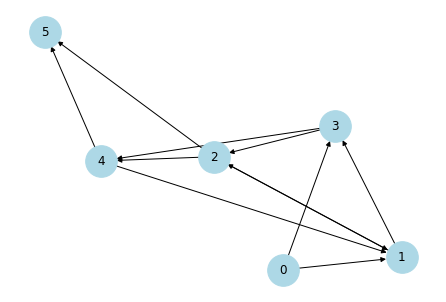

In [23]:
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True, node_size=1000, node_color='lightblue')

## Tiefensuche

In [24]:
def depth_first_exploration(graph, node, visited=None):
    if visited is None:
        visited = set()
    if node in visited:
        return
    visited.add(node)
    print("exploring", node)
    for s in graph.successors(node):
        depth_first_exploration(graph, s, visited)

In [25]:
depth_first_exploration(g, 0)

exploring 0
exploring 1
exploring 2
exploring 4
exploring 5
exploring 3


In [26]:
def depth_first_exploration_with_preorder(graph, node, 
                                          visited=None,
                                          preorder=[]):
    if visited is None:
        visited = set()
    if node in visited:
        return
    visited.add(node)
    preorder.append(node)

    for s in graph.successors(node):
        depth_first_exploration_with_preorder(graph, s, visited, preorder)

preorder = []
depth_first_exploration_with_preorder(g, 0, preorder=preorder)
print(preorder)

[0, 1, 2, 4, 5, 3]


In [27]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

C:\Users\luetma00\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\luetma00\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


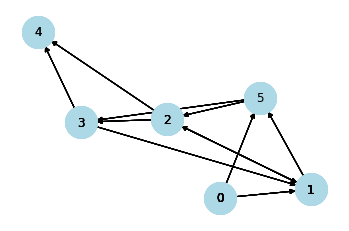

In [28]:
def update(num, order):
    labels = dict((node, ind) for ind, node in enumerate(order[:num+1]))
    nx.draw(g, pos, labels=labels, node_size=1000, node_color='lightblue')


fig, ax = plt.subplots()
ani = FuncAnimation(fig, func=update, frames=range(len(preorder)), fargs=(preorder,), interval=800, repeat=True)
HTML(ani.to_html5_video())


## Breitensuche

In [29]:
from collections import deque

def bfs_with_predecessors(graph, node):
    predecessor = dict()
    node_depth = dict()
    queue = deque()
    # use self-loop for start node
    predecessor[node] = node
    node_depth[node] = 0
    queue.append(node)
    while queue:
        v = queue.popleft()
        for s in graph.successors(v):
            if s not in predecessor:
                predecessor[s] = v
                node_depth[s] = node_depth[v] + 1
                queue.append(s)
    return predecessor, node_depth

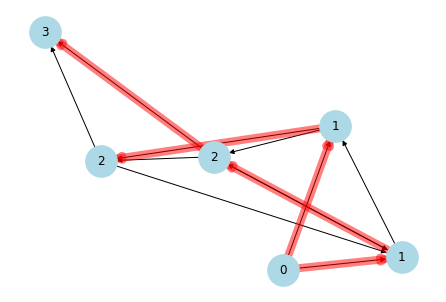

In [30]:
predecessor, node_depth = bfs_with_predecessors(g, 0)
nx.draw(g, pos, labels=node_depth, node_size=1000, node_color='lightblue')
induced_tree = [(pre, node) for node, pre in predecessor.items()]
d = nx.draw_networkx_edges(g, pos,
                       edgelist=induced_tree,
                       width=8, alpha=0.5, edge_color='r')